In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np

In [2]:
## 1) Concatena varios arquivos csv, num só
# %run ./util.ipynb
# path_startup = "/home/alex/vscode/data/original/crunchbase/startups/**/*.csv"
# df_startup = concat_files(path_startup, ['Organization Name'])
# df_startup.to_csv("/home/alex/vscode/data/original/crunchbase/consolidado/startups.csv")

In [3]:
%run ./load_datasets.ipynb
dfd = load_dealroom()
dfc_old = load_crunchbase(year_limit=2017)

C:\Users\alex\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (6,15,16,38,39,41,42,43,46,66,77) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [117]:
## 5) Cria uma coluna para cada industria do dataset
ind = dfc_old[['Industries', 'id']].assign(
        Industries=dfc_old['Industries'].str.split(',')).explode('Industries')
df_ind = ind.merge(right=dfc_old, on='id', how='left')

In [118]:
## 6) Seleciona somente as top 10 industrias (por frequência)
relevant_ind = df_ind['Industries_x'].isin(
                        pd.value_counts(df_ind['Industries_x']).iloc[:10].index)
df_rel_ind = df_ind[relevant_ind]

[Text(0, 0.5, 'Indústrias'), Text(0.5, 0, 'Quantidade de Empresas')]

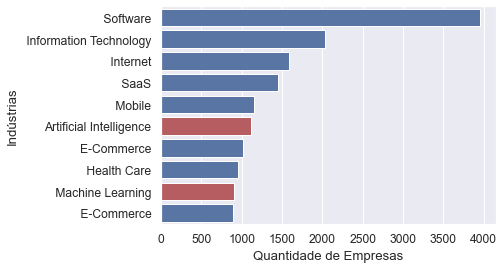

In [130]:
## 7) Plota as top 10 indústrias
sns.set(font_scale=1.1)
my_pal = {ind: "r" if ind in ['Artificial Intelligence', ' Machine Learning'] 
                      else "b" for ind in df_ind["Industries_x"].unique()}
ax = sns.countplot(y="Industries_x", data=df_ind, palette=my_pal, 
                   order=pd.value_counts(df_ind['Industries_x']).iloc[:10].index)
ax.set(xlabel='Quantidade de Empresas', ylabel="Indústrias")

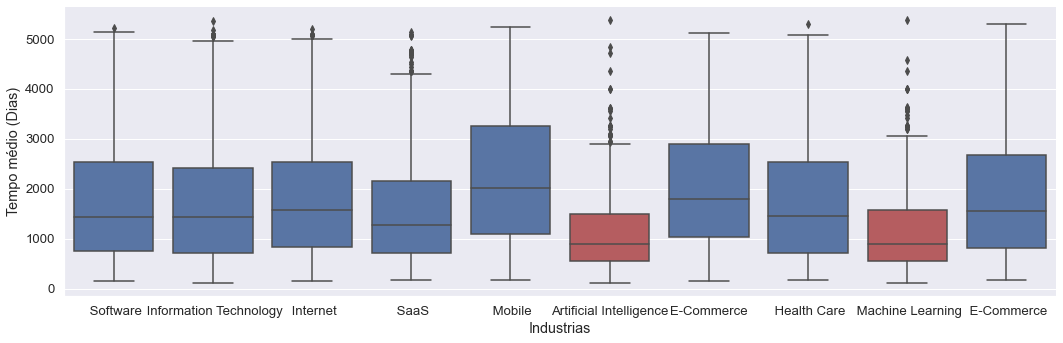

In [134]:
## 8) Plota o gráfico Tempo médio das rodadas de investimento X Indústria
sns.set(font_scale=1.2)
my_pal = {ind: "r" if ind in ['Artificial Intelligence', ' Machine Learning'] 
                      else "b" for ind in df_ind["Industries_x"].unique()}
ax = sns.catplot(y="average_if_period", data=df_ind, kind="box", 
                 x="Industries_x", aspect=3, palette=my_pal, 
                 order=pd.value_counts(df_ind['Industries_x']).head(10).index)
ax.set(xlabel='Industrias', ylabel="Tempo médio (Dias)")

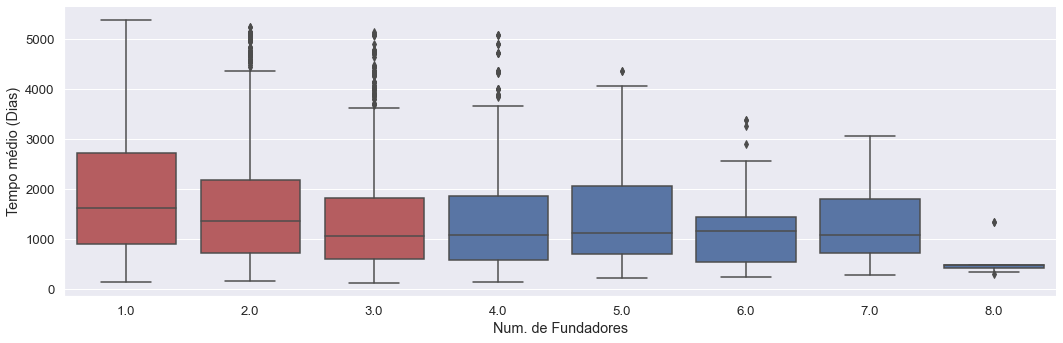

In [10]:
## 9) Plota o gráfico Tempo médio das rodadas de investimento X Quantidade de Fundadores
my_pal = {n: "r" if n in [2., 1., 3.] 
                      else "b" for n in df_rel_ind["Number of Founders"].unique()}
ax = sns.catplot(y="average_if_period", data=df_rel_ind, kind="box", 
                 x="Number of Founders", aspect=3, palette=my_pal)
ax.set(xlabel='Num. de Fundadores', ylabel="Tempo médio (Dias)")

[Text(0, 0.5, 'Num. de Fundadores'), Text(0.5, 0, 'Num. de Startups')]

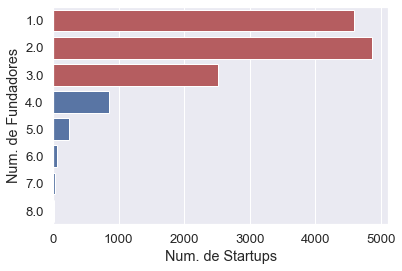

In [132]:
ax = sns.countplot(y="Number of Founders", data=df_rel_ind, palette=my_pal)
ax.set(ylabel='Num. de Fundadores', xlabel="Num. de Startups")

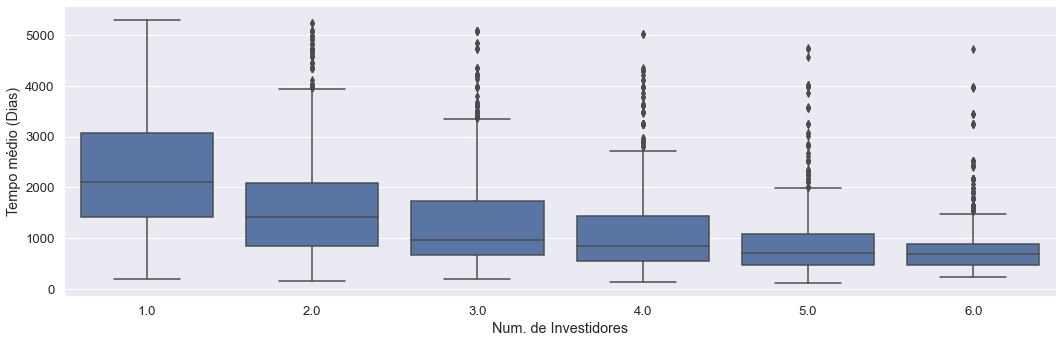

In [133]:
## 10) Plota o gráfico Tempo médio das rodadas de investimento X Quantidade de Investidores
my_pal = {n: "b" if n in [2., 1., 3.] 
                      else "b" for n in df_rel_ind["Number of Investors"].unique()}
ax = sns.catplot(y="average_if_period", data=df_rel_ind, kind="box", 
                 x="Number of Investors", aspect=3, palette=my_pal,
                 order=pd.value_counts(df_rel_ind['Number of Investors']).iloc[:6].index)
ax.set(xlabel='Num. de Investidores', ylabel="Tempo médio (Dias)")

[Text(0, 0.5, 'Num. de Investidores'), Text(0.5, 0, 'Num. de Startups')]

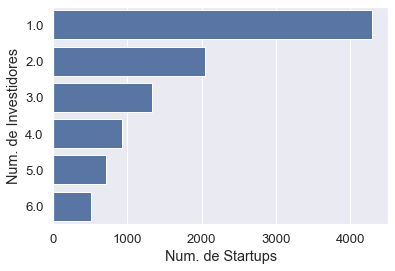

In [134]:
ax = sns.countplot(y="Number of Investors", data=df_rel_ind, palette=my_pal,
                 order=pd.value_counts(df_rel_ind['Number of Investors']).iloc[:6].index)
ax.set(ylabel='Num. de Investidores', xlabel="Num. de Startups")

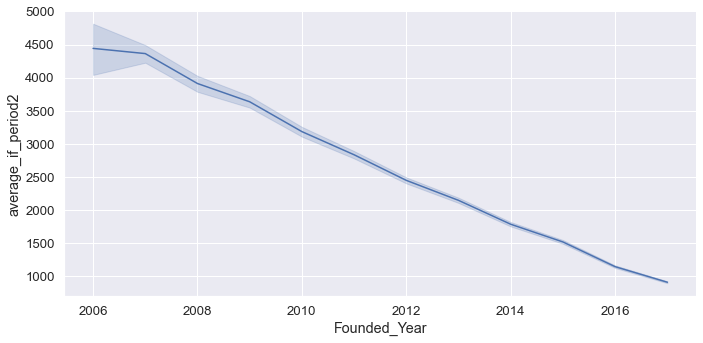

In [72]:
dfc1 = dfc_old[["Founded_Year", "average_if_period2"]]
dfc1.loc[:, 'dataset'] = "Crunchbase"
dfc1.rename(columns={"average_if_period2": "Prazo Médio", "Founded_Year": "Ano"}, inplace=True)

dfd1 = dfd[["launch_year", "average_funding_period2"]]
dfd1.loc[:, 'dataset'] = "Dealroom"
dfd1.rename(columns={"average_funding_period2": "Prazo Médio", "launch_year": "Ano"}, inplace=True)
dfconcat = pd.concat([dfc1, dfd1], axis=0)

C:\Users\alex\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\alex\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\alex\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

[Text(0, 0.5, 'Average Round Period'), Text(0.5, 0, 'Founded Year')]

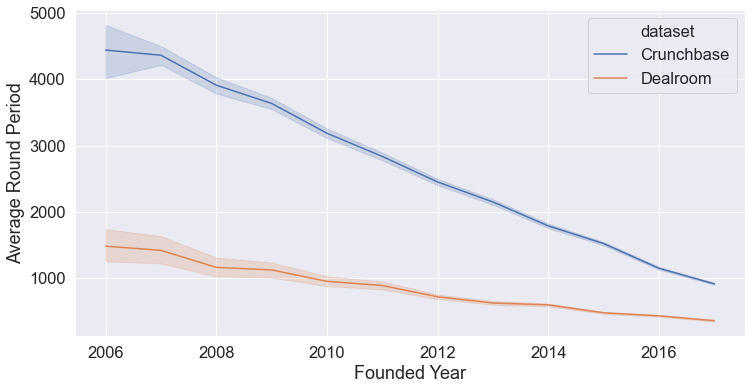

In [137]:
sns.set(font_scale=1.5)
fig, ax1 = plt.subplots(figsize=(12,6))
ax = sns.lineplot(x="Ano", ax=ax1, data=dfconcat, y="Prazo Médio", hue="dataset")
ax.set(xlabel="Founded Year", ylabel="Average Round Period")

In [109]:
dfc_old.head(2)
dfc2 = pd.DataFrame()
dfc2["HQ COUNTRY"] = dfc_old["Headquarters Location"].apply(lambda x: str(x).split(',')[-1].strip())
dfc2.loc[:, 'dataset'] = "Crunchbase"
dfd2 = dfd[["HQ COUNTRY"]]
dfd2.loc[:, 'dataset'] = "Dealroom"
dfconcat2 = pd.concat([dfc2, dfd2], axis=0)
dfconcat2.rename(columns={"HQ COUNTRY": "País Sede"}, inplace=True)

C:\Users\alex\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\alex\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


[Text(0, 0.5, 'HQ Country'), Text(0.5, 0, 'Number of Startups')]

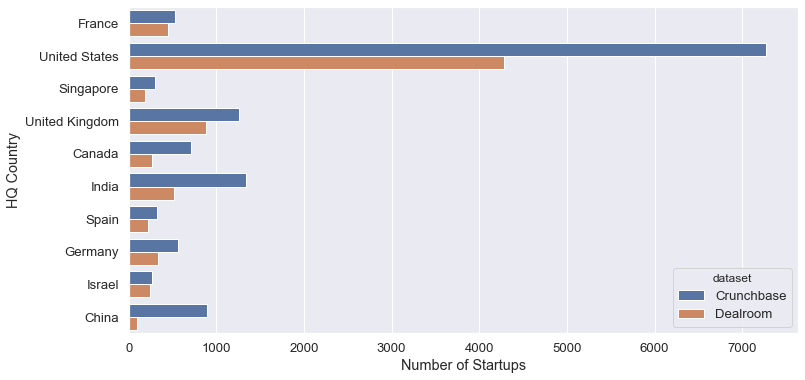

In [135]:
top10 = dfconcat2["País Sede"].value_counts().head(10).index
fig, ax1 = plt.subplots(figsize=(12,6))
ax = sns.countplot(data=dfconcat2[dfconcat2['País Sede'].isin(top10)], y="País Sede", hue="dataset", ax=ax1)
ax.set(xlabel="Number of Startups", ylabel="HQ Country")

In [13]:
dfc = load_crunchbase()

In [14]:
shape_dfd = dfd.shape
shape_dfc = dfc.shape
pct_null_dfd = 100*np.sum(dfd.isnull().sum())/(shape_dfd[0]*shape_dfd[1])
pct_null_dfc = 100*np.sum(dfc.isnull().sum())/(shape_dfc[0]*shape_dfc[1])

In [16]:
pct_null_dfd

16.858146873207115

In [17]:
pct_null_dfc

57.31561473981548